In [126]:
"""Module Import"""

import numpy as np
import pandas as pd
import random
import tqdm
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [127]:
"""사용할 테이터 셋 Classification용도로 Iris 데이터 가져옴"""

iris_data = load_iris()
df = pd.DataFrame(iris_data.data)
df.columns = iris_data['feature_names']
df['target'] = iris_data['target']

df.shape

(150, 5)

**Step 1: Construct Proximity/Distacne Matrix**

일반적인 데이터를 거리나 유사도 행렬로 변환한다. 이때, $X^{d*n}$ → $D^{n*n}$ 이렇게 변환한다.
이때 거리나 유사도 행렬은 항상 0보다 크며, 자신과의 거리는 0이다.

In [128]:
"""Step 1: Construct Proximity/Distacne Matrix"""

D_matrix = np.zeros((df.shape[0],df.shape[0]))

for i in range(df.shape[0]):
    for j in range(df.shape[0]):
        # D_matrix[i,j] = np.linalg.norm(df.values[i,:] - df.values[j,:])
        D_matrix[i,j] = np.sum(((df.values[i,:]-df.values[j,:])**2))

**Step 2: Extract the coordinates that preserve the distance information**


Coordinate matrix를 구하기 위한 과정. 

거리행렬에서 바로 저차원의 데이터로 변환이 불가하기에, inner product B를 계산해야함. 이때, B를 계산하기 위하여 H, A matrix 구한다.

이후, B_matrix로부터 Eigen decomposition을 수행하여 Eigen vector를 얻고, 이를 통하여 Diagonal matrix를 계산한다.

In [129]:
"""Step 2: Extract the coordinates that preserve the distance information
"""

H_matrix = np.identity(n= df.shape[0]) - ((1/df.shape[0])*(np.ones(df.shape[0])).T)

A_matrix = (-1/2)*(D_matrix)

B_matrix = H_matrix@A_matrix@H_matrix

Eigen_value, Eigen_vector = np.linalg.eig(B)

diagonal_matrix = Eigen_vector.T@B_matrix@Eigen_vector

coordinate_matrix = Eigen_vector@(diagonal_matrix**(1/2))


**Step 3: Visualizing**

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


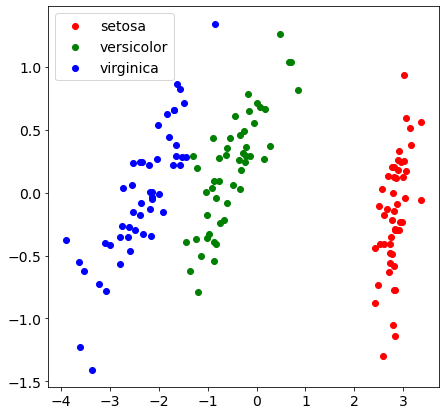

In [130]:
"""Step 3: Visualizing"""

colors = ['red','green','blue']
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
for i in np.unique(iris_data.target):
  subset = coordinate_matrix[iris_data.target == i]
  
  x = [row[0] for row in subset]
  y = [row[1] for row in subset]
  plt.scatter(x,y,c=colors[i],label=iris_data.target_names[i])
plt.legend()
plt.show()